
# ARIMA Demand Forecasting for Optima Batteries
# Author: Emanuele Pedrona
# Date: August 2024

This Jupyter Notebook demonstrates how to use an ARIMA model to forecast the demand for Optima batteries based on a historical dataset. The notebook also includes a chatbot that can answer questions about the dataset and the forecast results.

In [1]:
! pip3 install --upgrade --user google-cloud-aiplatform 

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import vertexai as vx


In [3]:

# Load the dataset from a CSV file
data = pd.read_csv("optima_batteries.csv")

# Convert the date column to datetime format
data["date"] = pd.to_datetime(data["date"])

In [4]:
# Create a new column for total price
data["total_price"] = data["price"] * data["quantity"]

# Group by date and aggregate the total price
daily_sales = data.groupby(data["date"].dt.date)["total_price"].sum()

# Convert the grouped data into a DataFrame
daily_sales = daily_sales.reset_index()

# Rename the columns
daily_sales.columns = ["date", "total_price"]

# Set the date column as the index
daily_sales["date"] = pd.to_datetime(daily_sales["date"])
daily_sales = daily_sales.set_index("date")

# Ensure the time series is complete by filling missing dates with 0 sales
daily_sales = daily_sales.asfreq('D', fill_value=0)

Apply the ARIMA Model

MSE: 200046.21098208195


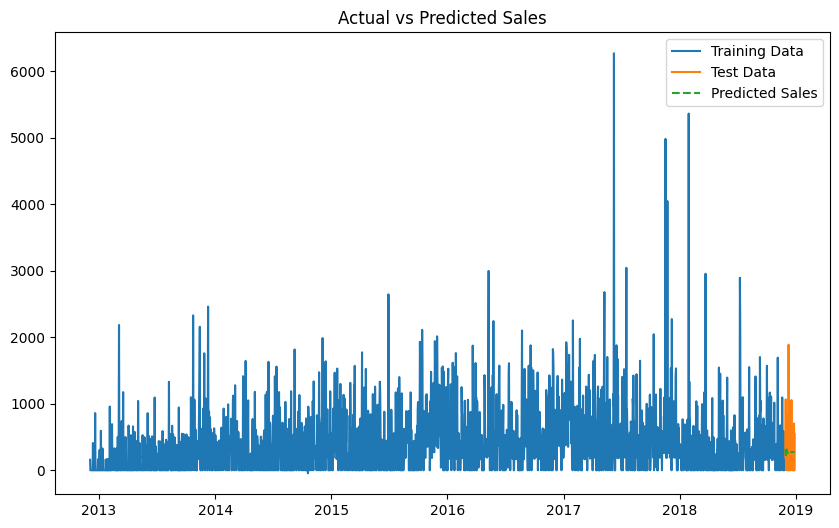

In [5]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_data = daily_sales[:-30]
test_data = daily_sales[-30:]

# Create and fit the ARIMA model
model = ARIMA(train_data["total_price"], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate the mean squared error (MSE)
mse = ((predictions - test_data["total_price"]) ** 2).mean()

# Print the MSE
print("MSE:", mse)

# Plot the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["total_price"], label="Training Data")
plt.plot(test_data.index, test_data["total_price"], label="Test Data")
plt.plot(test_data.index, predictions, label="Predicted Sales", linestyle='--')
plt.legend(loc='best')
plt.title("Actual vs Predicted Sales")
plt.show()

Forecast the future sales

Forecasted Sales for the next 30 days:
2018-11-29    314.122552
2018-11-30    243.453668
2018-12-01    225.999687
2018-12-02    303.163246
2018-12-03    313.248088
2018-12-04    256.025939
2018-12-05    278.282526
2018-12-06    266.803725
2018-12-07    266.114362
2018-12-08    280.954723
2018-12-09    282.656319
2018-12-10    271.849413
2018-12-11    274.618787
2018-12-12    272.802929
2018-12-13    273.251844
2018-12-14    276.175536
2018-12-15    276.436365
2018-12-16    274.328189
2018-12-17    274.575627
2018-12-18    274.303883
2018-12-19    274.519586
2018-12-20    275.109074
2018-12-21    275.140826
2018-12-22    274.715250
2018-12-23    274.707893
2018-12-24    274.672047
2018-12-25    274.742793
2018-12-26    274.864163
2018-12-27    274.865225
2018-12-28    274.776378
Freq: D, Name: predicted_mean, dtype: float64


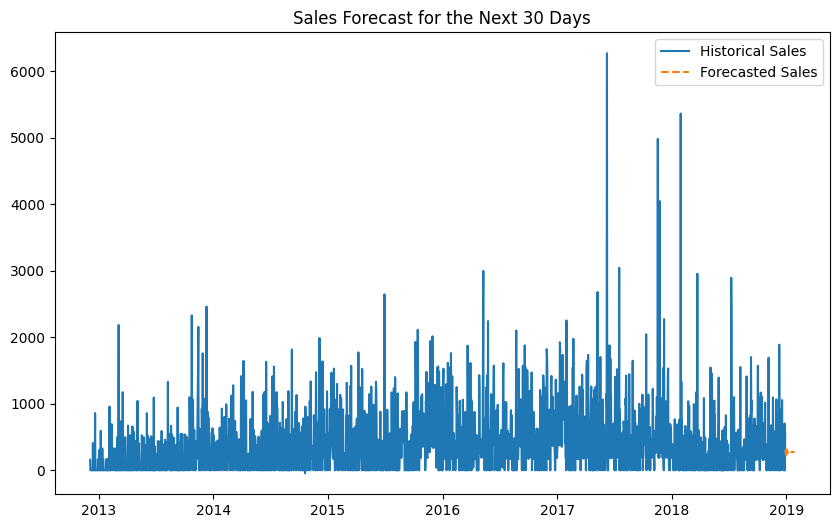

In [6]:
# Forecast future sales (e.g., next 30 days)
forecast = model_fit.forecast(steps=30)

# Print the forecasted values
print("Forecasted Sales for the next 30 days:")
print(forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales["total_price"], label="Historical Sales")
plt.plot(pd.date_range(start=daily_sales.index[-1], periods=31, freq='D')[1:], forecast, label="Forecasted Sales", linestyle='--')
plt.legend(loc='best')
plt.title("Sales Forecast for the Next 30 Days")
plt.show()